Main Steps in any ML project (Harley's steps)

<ol>
    <li>Define objective</li>
    <li>Load the data</li>
    <li>Explore the data</li>
    <li>Feature Engineering</li>
    <li>Test some ML Models</li>
    <li>Optimize the data</li>
    <li>Tune the Model</li>
    <li>Formalize the process</li>
</ol>

<h2>Define Objective</h2>
Predict the species of Iris plant from measurements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml
import ssl
import certifi

In [4]:
ssl._create_default_https_context = ssl._create_unverified_context

<h2>Load the data</h2>

In [5]:
dataset = fetch_openml(data_id=61, as_frame=True)

In [6]:
print(dir(dataset))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


<h2>Explore the data</h2>

In [7]:
iris = dataset.frame
iris.sample(5)

,sepallength,sepalwidth,petallength,petalwidth,class
113,5.7,2.5,5.0,2.0,Iris-virginica
92,5.8,2.6,4.0,1.2,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [8]:
iris.shape

(150, 5)

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sepallength  150 non-null    float64 
 1   sepalwidth   150 non-null    float64 
 2   petallength  150 non-null    float64 
 3   petalwidth   150 non-null    float64 
 4   class        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [10]:
#iris['class'] = iris['class'].as_type('category')

In [11]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


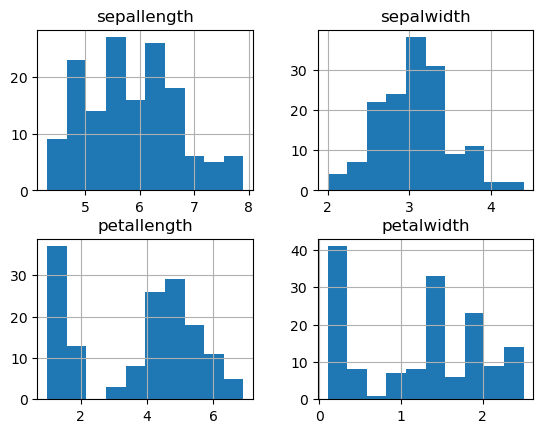

In [12]:
iris.hist(bins=10)
plt.show()

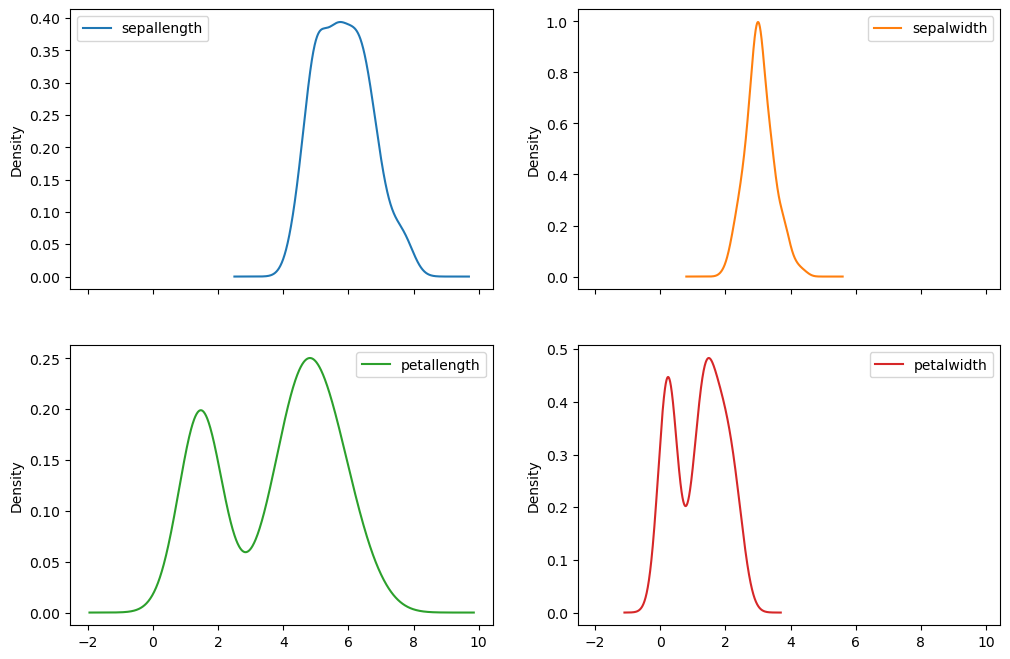

In [13]:
iris.plot(kind='density', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.show()

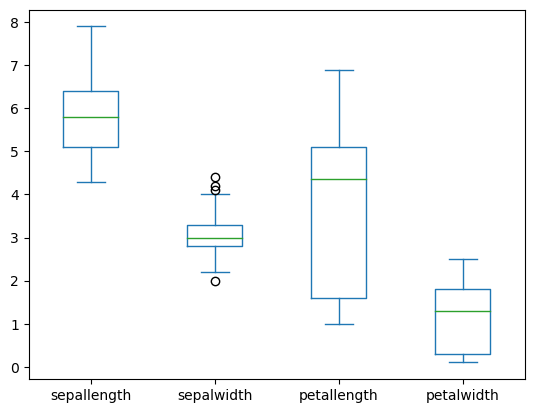

In [14]:
iris.plot(kind='box')
plt.show()

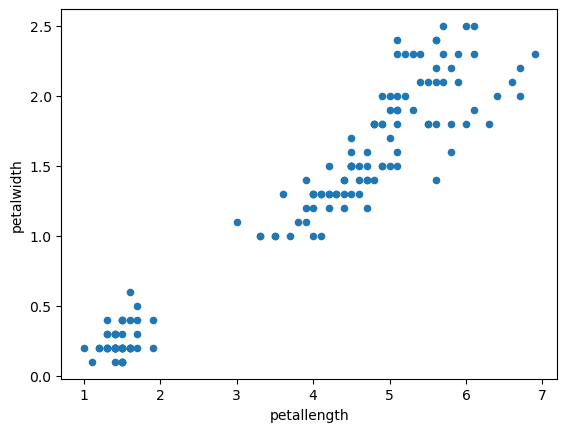

In [15]:
iris.plot.scatter(x='petallength', y='petalwidth')
plt.show()

In [16]:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<h2>Feature Engineering</h2>

In [17]:
features = iris.drop(['class'], axis=1)
labels = iris['class']

In [18]:
labels.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [19]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=7)

In [20]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(120, 4)
(30, 4)
(120,)
(30,)


<h2>Test a few models</h2>

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()

model.fit(train_x, train_y)

LogisticRegression()

In [23]:
predict = model.predict(test_x)

In [24]:
score = model.score(test_x, test_y)

In [25]:
print(score)

0.8666666666666667


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
models = [
    ['LogisticRegression', LogisticRegression()],
    ['KNeighborsClassifier', KNeighborsClassifier()],
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['SVC', SVC()],
    ['RandomForestClassifier', RandomForestClassifier()],
    ['GaussianNB', GaussianNB()]
]

In [28]:
results = {}

for name, model in models:
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    results[name] = predictions

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
for name, predictions in results.items():
    score = accuracy_score(test_y, predictions)
    print(f'{name} - {score * 100:.2f}')

LogisticRegression - 86.67
KNeighborsClassifier - 90.00
DecisionTreeClassifier - 90.00
SVC - 86.67
RandomForestClassifier - 86.67
GaussianNB - 83.33
